# Requerment
1. numpy == 1.26.4
2. pandas == 2.2.2
3. matplotlib == 3.9.0
4. seaborn == 0.13.2
5. scipy == 1.14.0
6. scikit-learn == 1.5.0
# Links
[dataset](http://https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)
[Code](https://github.com/nitinrana1504/Kaggle.git) 

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, RandomizedSearchCV,
    cross_val_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix,
    classification_report, log_loss
)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

# Load Data and Initial exploration: head, nulls, duplicates

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
if 'customerID' in df.columns:
    dup_count = df['customerID'].duplicated().sum()
    print(f'Duplicates by customerID: {dup_count}')

Duplicates by customerID: 0


# Data Cleaning / Fixes

In [7]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [10]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

# Data Visualization

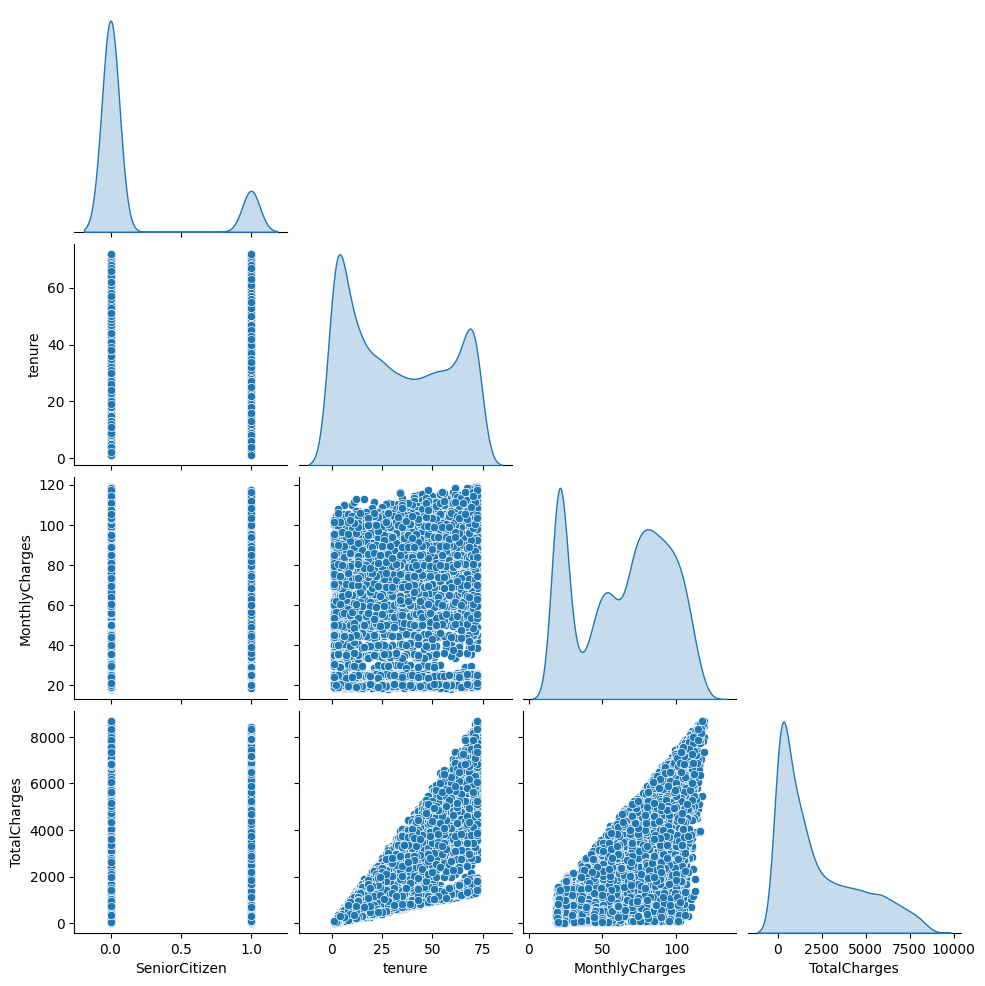

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True)

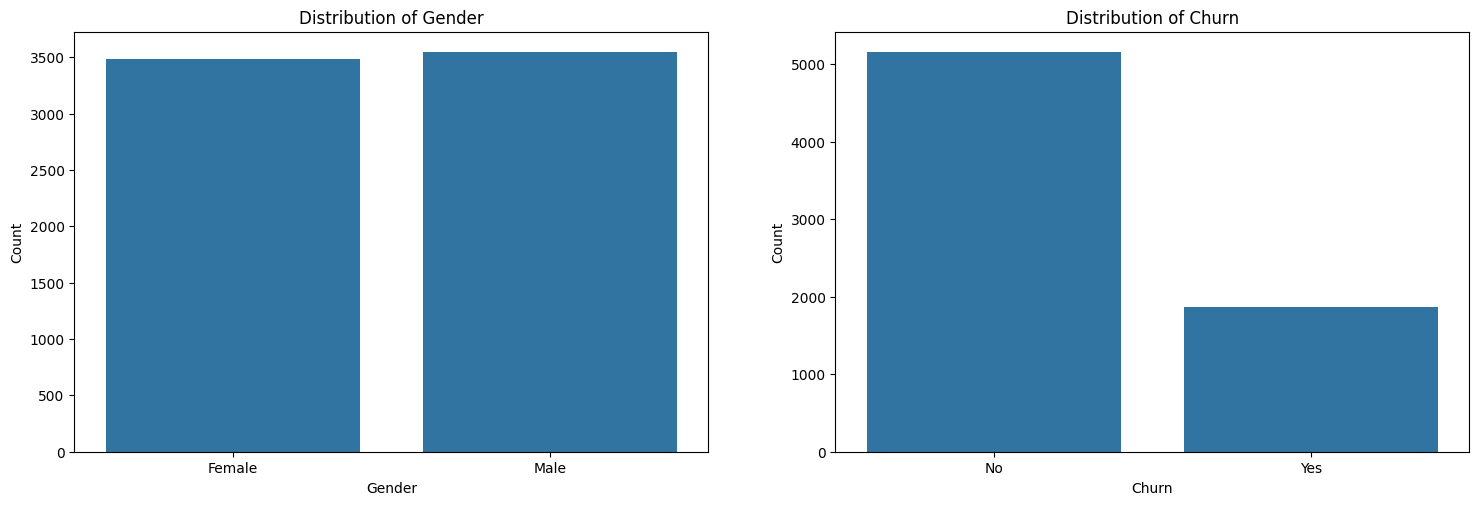

In [12]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.countplot(data = df,x = 'gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


plt.subplot(2, 2, 2)
sns.countplot(data = df,x = 'Churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

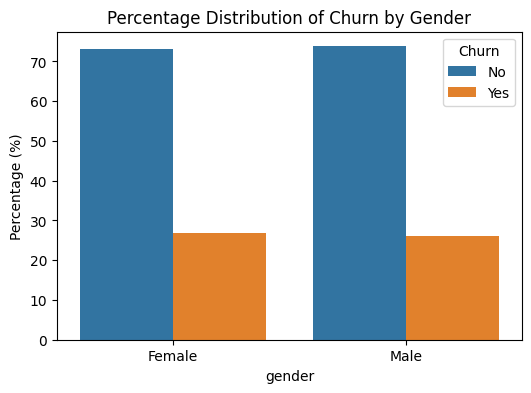

In [13]:
plt.figure(figsize=(6, 4))
gender_churn_pct = (df.groupby(['gender','Churn']).size() /
df.groupby('gender').size() * 100).reset_index(name='Percentage')
sns.barplot(data=gender_churn_pct, x='gender', y='Percentage', hue='Churn')
plt.title('Percentage Distribution of Churn by Gender')
plt.ylabel('Percentage (%)')
plt.show()

The churn rate for males (approx. 27%) is almost the same as the churn rate for females (approx. 28%).

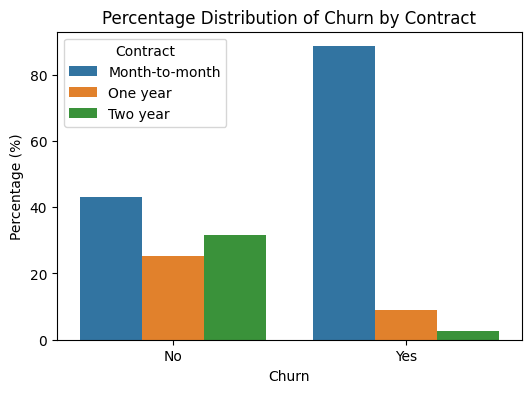

In [14]:
plt.figure(figsize=(6, 4))
Contract_churn_pct = (df.groupby(['Churn','Contract']).size() /
df.groupby('Churn').size() * 100).reset_index(name='Percentage')
sns.barplot(data=Contract_churn_pct, x='Churn', y='Percentage', hue='Contract')
plt.title('Percentage Distribution of Churn by Contract')
plt.ylabel('Percentage (%)')
plt.show()

1. Fiber Optic is the Highest Churn Driver: Customers with Fiber optic service have a significantly higher churn rate than any other group.
2. No Internet Service has the Lowest Churn: Customers who do not have internet service churn at a much lower rate.
3. DSL Service has Moderate Churn: Customers with DSL service have a moderate churn rate, much lower than Fiber optic but higher than the "No" service group. 

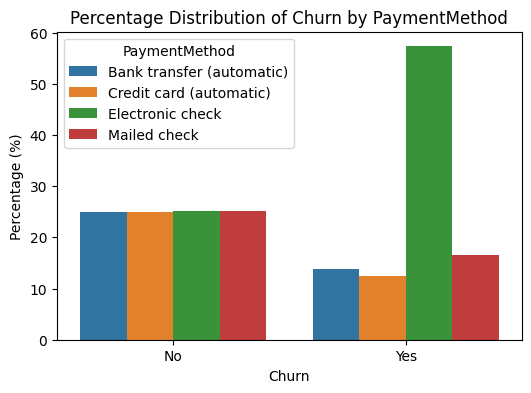

In [15]:
plt.figure(figsize=(6, 4))
Churn_PaymentMethod_pct = (df.groupby(['Churn','PaymentMethod']).size() /
df.groupby('Churn').size() * 100).reset_index(name='Percentage')
sns.barplot(data=Churn_PaymentMethod_pct, x='Churn', y='Percentage', hue='PaymentMethod')
plt.title('Percentage Distribution of Churn by PaymentMethod')
plt.ylabel('Percentage (%)')
plt.show()

1. Electronic Check is the Highest Churn Driver: Customers using Electronic check as their payment method have a significantly higher churn rate than any other group.
    * Approximately 45% of customers who pay via Electronic check churned.

2. Automatic Payments are the Lowest Churn Drivers: Customers using automatic payment methods (which are typically more convenient and reliable) have the lowest churn rates.
    * Credit card (automatic): Churn rate is around 15%.
    * Bank transfer (automatic): Churn rate is around 16%.
      
3. Mailed Check is Moderate: The churn rate for customers paying by Mailed check is moderate, falling between the Electronic check and the automatic payment methods.
    * Churn rate is approximately 20%.


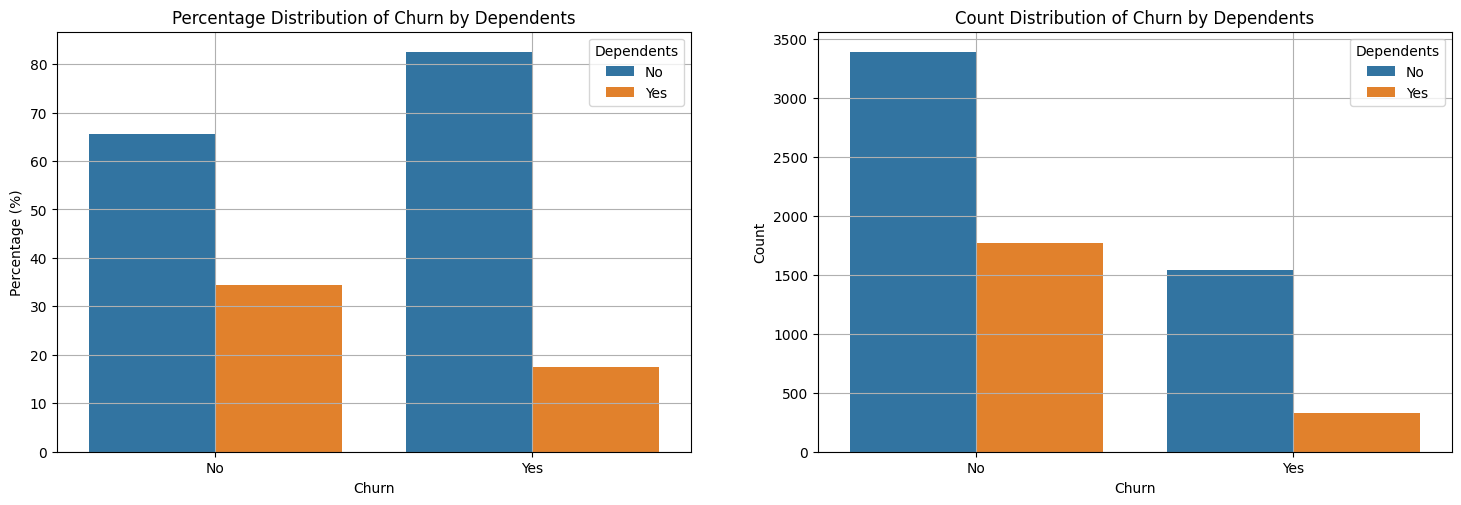

In [16]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
Churn_Dependents_pct = (df.groupby(['Churn','Dependents']).size() /
df.groupby('Churn').size() * 100).reset_index(name='Percentage')
sns.barplot(data=Churn_Dependents_pct, x='Churn', y='Percentage', hue='Dependents')
plt.title('Percentage Distribution of Churn by Dependents')
plt.ylabel('Percentage (%)')
plt.grid('True')

plt.subplot(2, 2, 2)
Churn_Dependents_count = df.groupby(['Churn','Dependents']).size().reset_index(name='Count')
sns.barplot(data=Churn_Dependents_count, x='Churn', y='Count', hue='Dependents')
plt.title('Count Distribution of Churn by Dependents')
plt.ylabel('Count')
plt.grid('True')
plt.show()


1. Month-to-month Contracts Drive the Highest Churn: Customers on a Month-to-month contract have an extremely high churn rate, indicating very low loyalty or commitment.
    * Approximately 42% of customers with a Month-to-month contract churned.

2. Longer Contracts Mean Higher Retention: There is a clear, inverse relationship between the contract length and the churn rate. Customers with longer-term contracts are far more stable.
    * One year contract churn rate is significantly lower, around 11%.
    * Two year contract churn rate is the lowest, at approximately 3%.

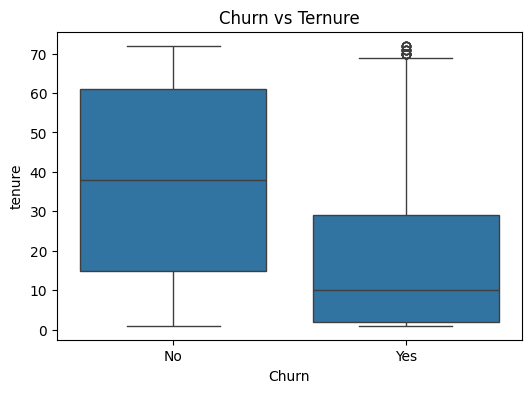

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = df, x = 'Churn', y = 'tenure')
plt.title('Churn vs Ternure')
plt.show()

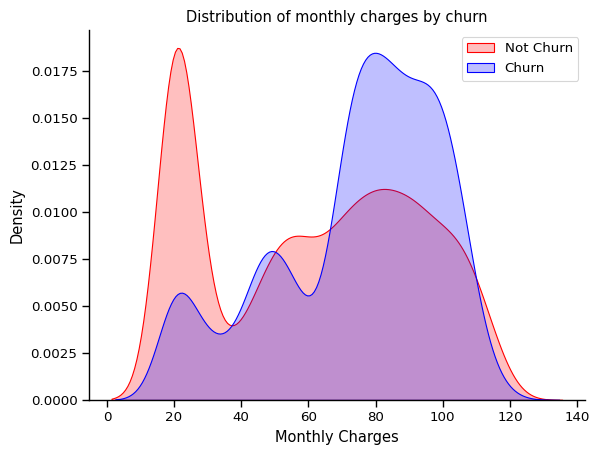

In [18]:
sns.set_context("paper", font_scale=1.1)
ax = sns.kdeplot(data=df[df["Churn"] == 'No'], x="MonthlyCharges", 
                 color="Red", fill=True, label="Not Churn")
ax = sns.kdeplot(data=df[df["Churn"] == 'Yes'], x="MonthlyCharges", 
                 color="Blue", fill=True, label="Churn", ax=ax)

ax.legend(loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
sns.despine()

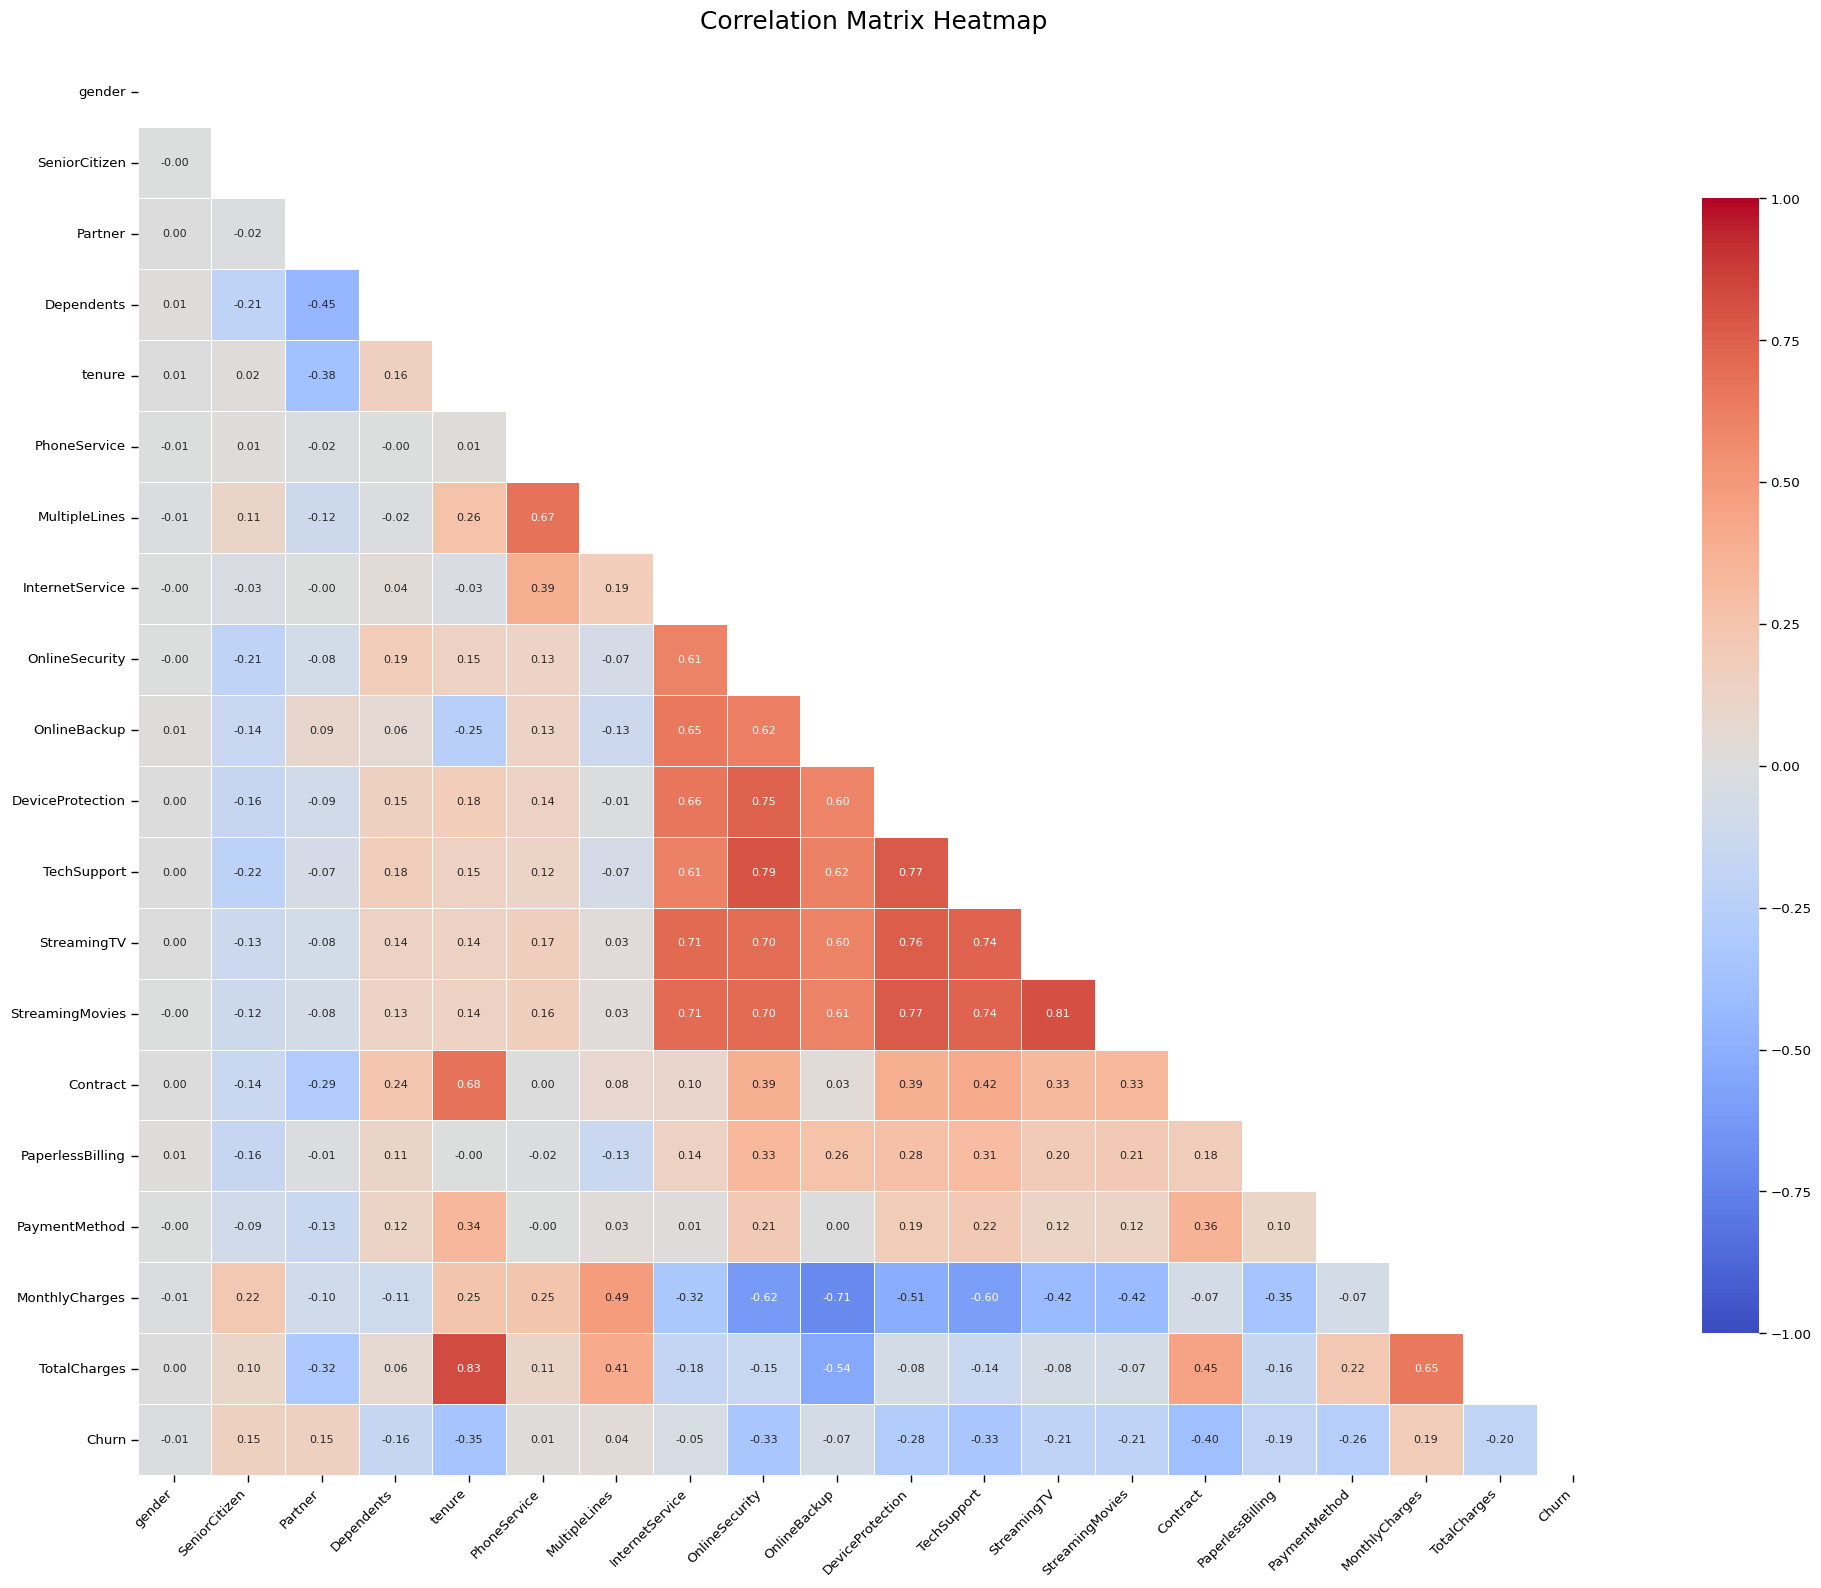

In [19]:
plt.figure(figsize=(20, 16))  # Adjusted size for better proportions

# Encode categorical variables
df_encoded = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)
corr = df_encoded.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns,
                 annot=True, annot_kws={'size': 8}, linewidths=.5, 
                 cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f',
                 cbar_kws={'shrink': 0.8})
ax.set_title('Correlation Matrix Heatmap', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ML Data Preprocessing

In [20]:
TARGET = "Churn"
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols.remove('Churn')

In [21]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [22]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
df1 = df.copy()

In [24]:
y_raw = df1[TARGET].astype(str)
y_unique = y_raw.unique()
print("Target classes:", y_unique)

Target classes: ['No' 'Yes']


In [25]:
le_y = LabelEncoder()
y = le_y.fit_transform(y_raw)
X = df1.drop(columns=[TARGET])

In [26]:
X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

In [27]:
X_calib, X_test, y_calib, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)
print("Sizes -> train:", len(X_train_full), "calib:", len(X_calib), "test:", len(X_test))

Sizes -> train: 4922 calib: 1055 test: 1055


In [28]:
from sklearn.preprocessing import FunctionTransformer
def winsorize_df(X_in, lower_q=0.01, upper_q=0.99):
    X = X_in.copy()
    for c in X.columns:
        low = np.nanquantile(X[c], lower_q)
        high = np.nanquantile(X[c], upper_q)
        X[c] = np.clip(X[c], low, high)
    return X

winsorizer = FunctionTransformer(winsorize_df)

num_pipeline = Pipeline([
    ("winsorize", winsorizer),
    ("imputer", IterativeImputer(random_state=0, max_iter=10)),
    ("scaler", StandardScaler()), 
])

In [29]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
], remainder="drop")

In [30]:
pipe_lr = Pipeline([
    ("preproc", preprocessor),
    ("pca", PCA(n_components=0.95, svd_solver="full")),
    ("clf", LogisticRegression(max_iter=2000, solver="saga", multi_class="auto"))
])

In [31]:
pipe_rf = Pipeline([
    ("preproc", preprocessor),
    ("pca", PCA(n_components=0.95, svd_solver="full")),
    ("clf", RandomForestClassifier(random_state=0, n_jobs=-1))
])

# ML Traning

In [32]:
param_dist_rf = {
    "clf__n_estimators": [100, 200, 400],
    "clf__max_depth": [None, 8, 16, 32],
    "clf__min_samples_split": [2, 5, 10],
    "clf__max_features": ["sqrt", 0.5, None]
}

param_dist_lr = {
    "clf__C": st.loguniform(1e-4, 1e2),
    "clf__penalty": ["l2", "elasticnet"],
    "clf__l1_ratio": [0.0, 0.5, 0.8]
}

In [33]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=2)

rnd_search_rf = RandomizedSearchCV(
    pipe_rf, param_distributions=param_dist_rf,
    n_iter=20, scoring="f1_macro", cv=inner_cv, random_state=0, n_jobs=-1
)

rnd_search_lr = RandomizedSearchCV(
    pipe_lr, param_distributions=param_dist_lr,
    n_iter=20, scoring="f1_macro", cv=inner_cv, random_state=0, n_jobs=-1
)

In [34]:
print("Running randomized searches (this may take a while)...")
rnd_search_rf.fit(X_train_full, y_train_full)
rnd_search_lr.fit(X_train_full, y_train_full)

print("RF best:", rnd_search_rf.best_params_, "score:", rnd_search_rf.best_score_)
print("LR best:", rnd_search_lr.best_params_, "score:", rnd_search_lr.best_score_)

Running randomized searches (this may take a while)...
RF best: {'clf__n_estimators': 100, 'clf__min_samples_split': 2, 'clf__max_features': None, 'clf__max_depth': 8} score: 0.7095559785789232
LR best: {'clf__C': 0.06944616560615821, 'clf__l1_ratio': 0.5, 'clf__penalty': 'elasticnet'} score: 0.7300858917853902


In [35]:
calibrator_sigmoid = CalibratedClassifierCV(rnd_search_rf, cv='prefit', method='sigmoid')
calibrator_sigmoid.fit(X_calib, y_calib)

CalibratedClassifierCV(cv='prefit',
                       estimator=RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=2, shuffle=True),
                                                    estimator=Pipeline(steps=[('preproc',
                                                                               ColumnTransformer(transformers=[('num',
                                                                                                                Pipeline(steps=[('winsorize',
                                                                                                                                 FunctionTransformer(func=<function winsorize_df at 0x000001D9D48CED40>)),
                                                                                                                                ('imputer',
                                                                                                                                 IterativeImputer(random_state=0)),
                                                                                                                                ('scale...
                                                                                                                 'PaperlessBilling',
                                                                                                                 'PaymentMethod'])])),
                                                                              ('pca',
                                                                               PCA(n_components=0.95,
                                                                                   svd_solver='full')),
                                                                              ('clf',
                                                                               RandomForestClassifier(n_jobs=-1,
                                                                                                      random_state=0))]),
                                                    n_iter=20, n_jobs=-1,
                                                    param_distributions={'clf__max_depth': [None,
                                                                                            8,
                                                                                            16,
                                                                                            32],
                                                                         'clf__max_features': ['sqrt',
                                                                                               0.5,
                                                                                               None],
                                                                         'clf__min_samples_split': [2,
                                                                                                    5,
                                                                                                    10],
                                                                         'clf__n_estimators': [100,
                                                                                               200,
                                                                                               400]},
                                                    random_state=0,
                                                    scoring='f1_macro'))

In [36]:
calibrator_sigmoid = CalibratedClassifierCV(rnd_search_lr, cv='prefit', method='sigmoid')
calibrator_sigmoid.fit(X_calib, y_calib)

CalibratedClassifierCV(cv='prefit',
                       estimator=RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=2, shuffle=True),
                                                    estimator=Pipeline(steps=[('preproc',
                                                                               ColumnTransformer(transformers=[('num',
                                                                                                                Pipeline(steps=[('winsorize',
                                                                                                                                 FunctionTransformer(func=<function winsorize_df at 0x000001D9D48CED40>)),
                                                                                                                                ('imputer',
                                                                                                                                 IterativeImputer(random_state=0)),
                                                                                                                                ('scale...
                                                                               PCA(n_components=0.95,
                                                                                   svd_solver='full')),
                                                                              ('clf',
                                                                               LogisticRegression(max_iter=2000,
                                                                                                  multi_class='auto',
                                                                                                  solver='saga'))]),
                                                    n_iter=20, n_jobs=-1,
                                                    param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D9DA4EB1A0>,
                                                                         'clf__l1_ratio': [0.0,
                                                                                           0.5,
                                                                                           0.8],
                                                                         'clf__penalty': ['l2',
                                                                                          'elasticnet']},
                                                    random_state=0,
                                                    scoring='f1_macro'))

**Test RandomForest Model**

In [37]:
if len(X_calib) > 500:
    calibrator_isotonic = CalibratedClassifierCV(rnd_search_rf, cv='prefit', method='isotonic')
    calibrator_isotonic.fit(X_calib, y_calib)
    calibrated_model = calibrator_isotonic
else:
    calibrated_model = calibrator_sigmoid

In [38]:
def bootstrap_metric(model, X, y, metric_fn, n_boot=1000, seed=0):
    rng = np.random.RandomState(seed)
    stats = []
    n = len(y)
    for i in range(n_boot):
        idxs = rng.randint(0, n, n)
        X_b = X.iloc[idxs] if isinstance(X, pd.DataFrame) else X[idxs]
        y_b = np.array(y)[idxs]
        try:
            preds = model.predict(X_b)
        except Exception:
            # if model expects arrays
            preds = model.predict(X_b)
        stats.append(metric_fn(y_b, preds))
    a = np.percentile(stats, 2.5)
    b = np.percentile(stats, 97.5)
    return np.mean(stats), (a, b)

y_pred_test = calibrated_model.predict(X_test)

In [39]:
acc = accuracy_score(y_test, y_pred_test)
f1m = f1_score(y_test, y_pred_test, average="macro")
print("Test Accuracy:", acc, "F1_macro:", f1m)

Test Accuracy: 0.7753554502369668 F1_macro: 0.6845656888310253


In [40]:
acc_mean, acc_ci = bootstrap_metric(calibrated_model, X_test, y_test, accuracy_score, n_boot=500)
f1_mean, f1_ci = bootstrap_metric(calibrated_model, X_test, y_test, lambda a,b: f1_score(a,b,average="macro"), n_boot=500)
print(f"Bootstrap Accuracy: {acc_mean:.3f}, 95% CI {acc_ci}")
print(f"Bootstrap F1_macro: {f1_mean:.3f}, 95% CI {f1_ci}")

Bootstrap Accuracy: 0.775, 95% CI (0.7516587677725118, 0.8009478672985783)
Bootstrap F1_macro: 0.684, 95% CI (0.6503161551463038, 0.717551738763453)


In [41]:
print("Classification report on test set:")
print(classification_report(y_test, y_pred_test, target_names=le_y.classes_))

Classification report on test set:
              precision    recall  f1-score   support

          No       0.82      0.89      0.85       775
         Yes       0.60      0.45      0.52       280

    accuracy                           0.78      1055
   macro avg       0.71      0.67      0.68      1055
weighted avg       0.76      0.78      0.76      1055



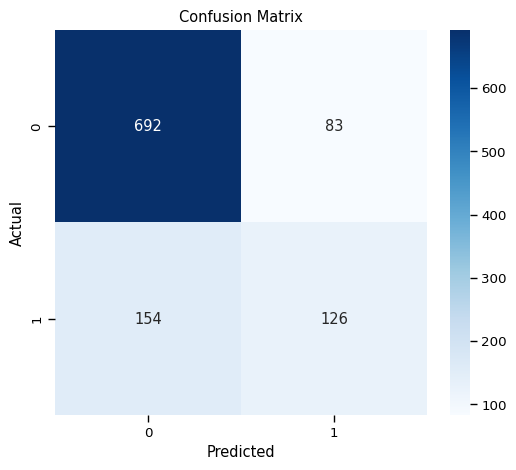

In [42]:
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Test LogisticRegression Model**

In [43]:
if len(X_calib) > 500:
    calibrator_isotonic = CalibratedClassifierCV(rnd_search_lr, cv='prefit', method='isotonic')
    calibrator_isotonic.fit(X_calib, y_calib)
    calibrated_model = calibrator_isotonic
else:
    calibrated_model = calibrator_sigmoid

In [44]:
def bootstrap_metric(model, X, y, metric_fn, n_boot=1000, seed=0):
    rng = np.random.RandomState(seed)
    stats = []
    n = len(y)
    for i in range(n_boot):
        idxs = rng.randint(0, n, n)
        X_b = X.iloc[idxs] if isinstance(X, pd.DataFrame) else X[idxs]
        y_b = np.array(y)[idxs]
        try:
            preds = model.predict(X_b)
        except Exception:
            # if model expects arrays
            preds = model.predict(X_b)
        stats.append(metric_fn(y_b, preds))
    a = np.percentile(stats, 2.5)
    b = np.percentile(stats, 97.5)
    return np.mean(stats), (a, b)

y_pred_test = calibrated_model.predict(X_test)

In [45]:
acc = accuracy_score(y_test, y_pred_test)
f1m = f1_score(y_test, y_pred_test, average="macro")
print("Test Accuracy:", acc, "F1_macro:", f1m)

Test Accuracy: 0.7696682464454976 F1_macro: 0.7076225809137243


In [46]:
acc_mean, acc_ci = bootstrap_metric(calibrated_model, X_test, y_test, accuracy_score, n_boot=500)
f1_mean, f1_ci = bootstrap_metric(calibrated_model, X_test, y_test, lambda a,b: f1_score(a,b,average="macro"), n_boot=500)
print(f"Bootstrap Accuracy: {acc_mean:.3f}, 95% CI {acc_ci}")
print(f"Bootstrap F1_macro: {f1_mean:.3f}, 95% CI {f1_ci}")

Bootstrap Accuracy: 0.769, 95% CI (0.7450236966824645, 0.7943127962085308)
Bootstrap F1_macro: 0.707, 95% CI (0.6754504667828273, 0.7365567795649125)


In [47]:
print("Classification report on test set:")
print(classification_report(y_test, y_pred_test, target_names=le_y.classes_))

Classification report on test set:
              precision    recall  f1-score   support

          No       0.85      0.84      0.84       775
         Yes       0.56      0.58      0.57       280

    accuracy                           0.77      1055
   macro avg       0.71      0.71      0.71      1055
weighted avg       0.77      0.77      0.77      1055



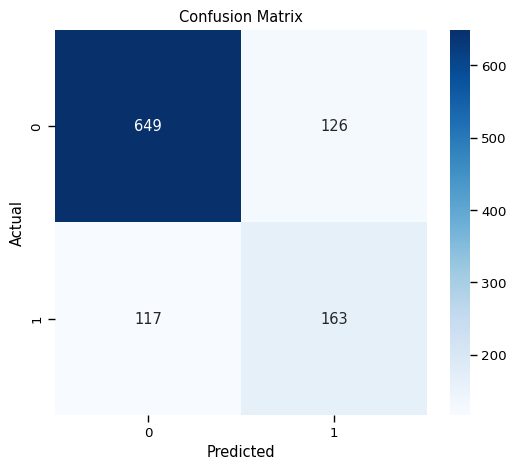

In [48]:
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Since both models had almost equal accuracy, right nowI proceeded with the logistic regression model.

In [49]:
def compute_nonconformity_probs(model, X_calib, y_calib):
    probs = model.predict_proba(X_calib)
    scores = 1.0 - np.array([probs[i, y_calib[i]] for i in range(len(y_calib))])
    return scores

calib_scores = compute_nonconformity_probs(calibrated_model, X_calib, y_calib)
coverage = 0.90
q = np.quantile(calib_scores, np.ceil((len(calib_scores)+1)*(1-coverage))/len(calib_scores) - 1e-12)
print("Conformal threshold (q) for coverage", coverage, ":", q)

Conformal threshold (q) for coverage 0.9 : 0.011363636363636354


In [50]:
def conformal_prediction_set(model, X_new, q_threshold):
    probs = model.predict_proba(X_new)
    sets = []
    for p in probs:
        nonconformity = 1.0 - p  # vector per class
        indices = np.where(nonconformity <= q_threshold)[0]
        # If empty (rare), return argmax
        if len(indices) == 0:
            indices = [np.argmax(p)]
        sets.append(indices)
    return sets

pred_sets = conformal_prediction_set(calibrated_model, X_test, q)

In [51]:
covered = np.mean([1 if (y_test[i] in pred_sets[i]) else 0 for i in range(len(y_test))])
avg_set_size = np.mean([len(s) for s in pred_sets])
print("Conformal marginal coverage on test:", covered)
print("Average prediction set size:", avg_set_size)

Conformal marginal coverage on test: 0.7696682464454976
Average prediction set size: 1.0


In [52]:
perm = permutation_importance(calibrated_model, X_test, y_test, n_repeats=20, random_state=0, n_jobs=-1)
preproc = preprocessor.fit(X)
ohe = preproc.named_transformers_['cat'].named_steps['onehot']
ohe_cols = list(ohe.get_feature_names_out(cat_cols))
feat_names = num_cols + ohe_cols

In [53]:
sorted_idx = perm.importances_mean.argsort()[::-1]
print("Top features by permutation importance (mean decrease in score):")
for i in sorted_idx[:15]:
    name = feat_names[i] if i < len(feat_names) else f"pc_{i-len(feat_names)+1}"
    print(f"{name}: mean={perm.importances_mean[i]:.4f}, std={perm.importances_std[i]:.4f}")

Top features by permutation importance (mean decrease in score):
gender_Female: mean=0.0258, std=0.0075
OnlineSecurity_No: mean=0.0023, std=0.0057
tenure: mean=0.0018, std=0.0019
Partner_Yes: mean=0.0011, std=0.0030
SeniorCitizen: mean=0.0004, std=0.0009
gender_Male: mean=0.0000, std=0.0004
PhoneService_Yes: mean=-0.0009, std=0.0043
InternetService_DSL: mean=-0.0013, std=0.0035
MonthlyCharges: mean=-0.0015, std=0.0021
MultipleLines_Yes: mean=-0.0018, std=0.0046
InternetService_Fiber optic: mean=-0.0022, std=0.0035
InternetService_No: mean=-0.0027, std=0.0052
TotalCharges: mean=-0.0029, std=0.0026
PhoneService_No: mean=-0.0031, std=0.0025
Dependents_Yes: mean=-0.0045, std=0.0031
